# Practical 3: Robust Linear Regression
### Ilaria Curzi
### Georgia Zavou

## 1. Introduction

1.1 We will propose a method for applying linear regression to randomly generated data points.
The goal is to find the best-fitting line represented by the equation $y_i = w_0 x_i + w_1$ where $w_0$ and $w_1$ are parameters to be estimated.

The idea is that, given a set of data points, the best-fitting line minimizes the prediction error, defined as $e_i = y_i - \hat{y}_i$ where $\hat{y}_i$ is the predicted value for each $x_i$.

The fitting process involves minimizing the least squares error function:
$$Q = \frac{1}{2} \sum_{i=1}^{m} e_i^2 = \frac{1}{2} \sum_{i=1}^{m} (y_i - \hat{y}_i)^2$$

The optimal values are often found using gradient descent, which updates parameters iteratively  $w_0$ and $w_1$ iteratively, reducing the error with each step:
$$
w_{k+1} = w_k - \alpha \nabla Q(w),
$$
where $\alpha$ is the learning rate and the gradient components are given by:

$$
\nabla Q(w) = \left( \frac{\partial Q}{\partial w_0}, \frac{\partial Q}{\partial w_1} \right).
$$

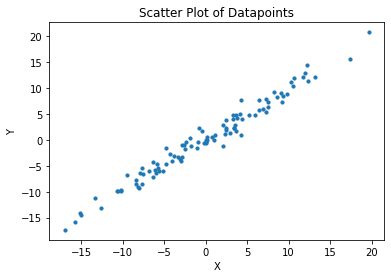

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

np.random.seed(5)

# Generate random datapoints without outliers
def generate_random_point(n):
  m = np.array([0., 0.])
  angle = 45 * math.pi / 180
  rot = np.array([[math.cos(angle), -math.sin(angle)], [math.sin(angle), math.cos(angle)]])
  lamb = np.array([[n, 0], [0, 1]])
  s = np.matmul(rot, np.matmul(lamb, rot.transpose()))

  points = np.random.multivariate_normal(m, s, n)

  return points

# Plot of the points
def plot_points(points):
  x = points[:, 0]
  y = points[:, 1]

  plt.scatter(x, y, marker='o', s=10, label='Random Points')
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.title('Scatter Plot of Datapoints')
  plt.show()


n = 100 # number of points
points = generate_random_point(n)
plot_points(points)

The data points appear to follow a linear trend, suggesting that there is a strong linear relationship between the predictor and the response variable.



In [2]:
# Define the function to be optimized
def func(x, y, w0, w1):
    return 1/2*(((w0*x+w1-y)**2).sum())

# Gradient of the function
def grad_func(x, y, w0, w1):
    return np.array([((w0*x+w1-y)*x).sum(), (w0*x+w1-y).sum()])

# Implement gradient descent optimization and backtracking
def grad_descent(f, x, y, w0 = 0, w1 = 0, max_iters = 100, threshold = (10**-3)):
    coeffs = np.array([w0, w1])
    steps = np.matrix(coeffs)
    steps = np.vstack([steps, coeffs])

    for i in range(1, max_iters):
        alpha = 1
        coeffs2 = coeffs - alpha * grad_func(x, y, coeffs[0], coeffs[1])

        while(f(x, y, coeffs2[0], coeffs2[1]) > f(x, y, coeffs[0], coeffs[1])):

            alpha = alpha / 2
            coeffs2 = coeffs - alpha * grad_func(x, y, coeffs[0], coeffs[1])

        if (f(x, y, coeffs[0], coeffs[1]) - f(x, y, coeffs2[0], coeffs2[1])) < threshold:
            i = i- 1 #stopping criteria
            break

        coeffs = coeffs2.copy()
        steps = np.vstack([steps, coeffs])
        f_value = f(x, y, coeffs[0], coeffs[1])

    return coeffs, steps, f_value, i+1

In [3]:
coeffs, steps, f, iters = grad_descent(f = func, x = points[:, 0], y = points[:, 1], w0 = 0, w1 = 0, max_iters = 1000, threshold = 10**-6)
print (coeffs)

# Calculate Q
predictions = coeffs[0] * points[:, 0] + coeffs[1]
Q = 0.5*(((predictions - points[:, 1]) ** 2).sum())
print("Coefficients:", coeffs)
print("Least Squared Error (Q):", Q)

[0.96447926 0.1822937 ]
Coefficients: [0.96447926 0.1822937 ]
Least Squared Error (Q): 77.30604542075238


Coefficients of the regressor: 0.9644792569601516 0.18229370412293178


Text(0.5, 1.0, 'Linear Regression Fit without outliers')

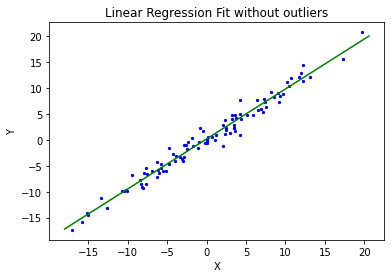

In [4]:
# Plot of the Linear Regression Fit without outliers
plt.scatter(points[:,0],points[:,1], c= 'blue',s=5)
reg = np.arange(points[:, 0].min() - 1, points[:, 0].max() + 1,0.1)
plt.plot(reg, reg * coeffs[0] + coeffs[1], color = 'green')
print("Coefficients of the regressor:", coeffs[0], coeffs[1])

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression Fit without outliers')

As expected, the linear regression model $(y=0.964x+0.182)$ fits the data points effectively. The value of the least squares error function is $Q = \frac{1}{2} \sum_{i=1}^{m} e_i^2 = 77.306$

1.2 We will now examine the sensitivity of the method to outliers, which are data points that lie outside the overall pattern of distribution and can be identified as extreme values significantly different from the rest of the points in a dataset. To begin, we will add a single outlier to observe how the linear regression model reacts. Later on , we will add more outliers to study the model's robustness to these deviations.

In [5]:
# Generate random datapoints with one outlier
points = generate_random_point(n=100)
points[1] = [-40, 20]
x1 = points[:, 0]
x2 = points[:, 1]
coeffs, steps, f, iters = grad_descent(f = func, x = x1, y = x2, w0 = 0, w1 = 0, max_iters = 1000, threshold = 10**-6)

Coefficients of the regressor: 0.6422607426507068 0.6645742240425668
Coefficients: [0.64226074 0.66457422]
Least Squared Error (Q): 1448.8370668315918


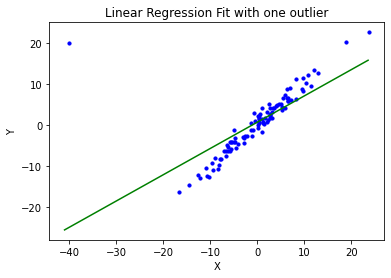

In [6]:
# Plot of the linear Regression Fit with one outlier
plt.scatter(points[:,0],points[:,1], c= 'blue',s=10)
x_aux = np.arange(x1.min() - 1, x2.max() + 1, 0.1)
plt.plot(x_aux, x_aux*coeffs[0] + coeffs[1], color = 'green')
print("Coefficients of the regressor:", coeffs[0], coeffs[1])

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression Fit with one outlier')

# Calculate Q
predictions = coeffs[0] * points[:, 0] + coeffs[1]
Q = 0.5*(((predictions - points[:, 1]) ** 2).sum())


# Print coefficients and Q
print("Coefficients:", coeffs)
print("Least Squared Error (Q):", Q)


We observe that the linear regression model now performs less effectively than before, demonstrating a high sensitivity to the presence of the outlier. This is confirmed by the significant increase in the value of the least squares error function $Q = \frac{1}{2} \sum_{i=1}^{m} e_i^2 = 1448.837$, indicating the model’s struggle to fit accurately as before due to the outlier.

We will now introduce additional outliers to observe how the model responds

Coefficients of the regressor: 0.49713648199043214 1.3845881715720993
Coefficients of the regressor: 0.49713648199043214 1.3845881715720993
Coefficients: [0.49713648 1.38458817]
Mean Squared Error (Q): 3233.8867689012504


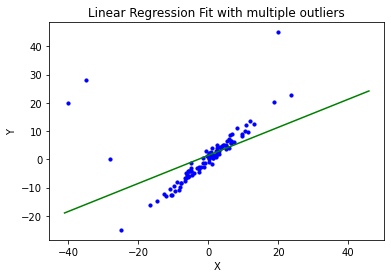

In [7]:
# Add more outliers
points[5] = [-35, 28]
points[16] = [20, 45]
points[42] = [-25,-25]
points[63] = [-28, 0]

x1 = points[:, 0]
x2 = points[:, 1]

# implementing gradient descent method
coeffs, steps, f, iters = grad_descent(f = func, x = x1, y = x2, w0 = 0, w1 = 0, max_iters = 1000, threshold = 10**-6)
print("Coefficients of the regressor:", coeffs[0], coeffs[1])

plt.scatter(points[:,0],points[:,1], c= 'blue',s=10)
x_aux = np.arange(x1.min() - 1, x2.max() + 1, 0.1)
plt.plot(x_aux, x_aux*coeffs[0] + coeffs[1], color = 'green')
print("Coefficients of the regressor:", coeffs[0], coeffs[1])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression Fit with multiple outliers')

# Calculate Q
predictions = coeffs[0] * points[:, 0] + coeffs[1]
Q = 0.5*(((predictions - points[:, 1]) ** 2).sum())

print("Coefficients:", coeffs)
print("Mean Squared Error (Q):", Q)

By adding even more outliers, the linear regression model struggles to capture the primary pattern of the data points. This suggests that outliers significantly influence the model's performance. Although these outliers may contain little meaningful information, they cause the model to deviate from the true trend in the data. Outliers are common in most data analyses, making it crucial to employ robust methods to handle them effectively and achieve reliable results.

## 2. Robust function

2.1 As we have seen, the Least Squares Method (LSM) is sensitive to outliers. The reason is that the error the LSM has to minimise in the case of the outlier is very large, which contributes more to the fit than the resulting fitting coefficients. One solution coul be use other robust error functions, such as the Cauchy function, which is defined to be:
$$
\rho(u) = \frac{c^2}{2} \log \left( 1 + \frac{u^2}{c^2} \right)
$$
We now plot both the Cauchy error function and the Least Squares error function.


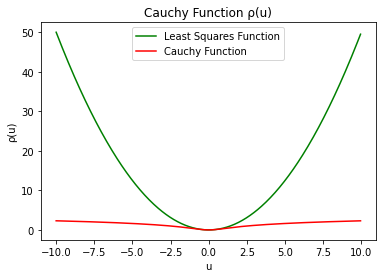

In [8]:
# Plotting both functions

u_funct = np.arange(-10, 10, 0.05)
c_cauchy = 1

plt.plot(u_funct, 1/2*(u_funct**2), color = 'green', label = "Least Squares Function")
plt.plot(u_funct, (c_cauchy**2/2) * np.log(1 + (u_funct/c_cauchy)**2), color = 'red', label = "Cauchy Function")
plt.title('Cauchy Function ρ(u)')
plt.xlabel('u')
plt.ylabel('ρ(u)')
plt.legend(loc="best")


The plot show the sensitivity of the two error functions to outliers.
Large errors significantly increase the value of the Least Squares error function,indicating that outliers have a huge impact on the error for LSM. In contrast, the Cauchy function appears more robust, limiting the influence of outliers on the estimated parameter values.

2.2 We now implement an algorithm that allows to compute the parameters w0 and w1 using the Cauchy function. For that issue we use the backtracking gradient descent method.

In [9]:
# Define cauchy function
def cauchy(x, y, w0 = 0, w1 = 0, c = 1):
    return ((c**2)/2*np.log(1 + (((w0*x)+w1-y)/c)**2)).sum()

# Function to get the gradient for Cauchy (2 partial gradients with respect to w0 and w1)
def grad_cauchy(x, y, w0, w1, c):
    return np.array([((c**2)/2*1/(1+(((w0*x)+w1-y)/c)**2)*2*(w0*x+w1-y)/(c**2)*x).sum(), (c**2/2*1/(1+((w0*x+w1-y)/c)**2)*2*(w0*x+w1-y)/(c**2)).sum()])

# implement Gradient Descent with Cauchy function
def grad_descent_cauchy(f, x, y, w0 = 0, w1 = 0, max_iters = 100, threshold = 10**-3, c = 1):
    coeffs = np.array([w0, w1])
    steps = np.matrix(coeffs)
    steps = np.vstack([steps, coeffs])
    for i in range(1, max_iters):
        alpha = 1
        coeffs2 = coeffs - alpha * grad_cauchy(x, y, coeffs[0], coeffs[1], c = c)
        while(f(x, y, coeffs2[0], coeffs2[1], c = c) > f(x, y, coeffs[0], coeffs[1], c = c)):
            alpha = alpha / 2
            coeffs2 = coeffs - alpha * grad_cauchy(x, y, coeffs[0], coeffs[1], c = c)
        if (f(x, y, coeffs[0], coeffs[1], c = c) - f(x, y, coeffs2[0], coeffs2[1], c = c)) < threshold:
            i -= 1
            break
        coeffs = coeffs2.copy()
        steps = np.vstack([steps, coeffs])
    f_value = f(x, y, coeffs[0], coeffs[1], c = c)

    return coeffs, steps, f_value, i+1

2.3 We now compare the results obtained with the least squares function and with the Cauchy function, assuming that there are no outliers in the dataset.

In [10]:
points1 = generate_random_point(100)
x11 = points1[:, 0]
x22 = points1[:, 1]
coeffs, steps, f, iters = grad_descent(func, x11, x22, 0, 0, 100, 10**-3)
coeffs2, steps2, f2, iters2 = grad_descent_cauchy(cauchy, x11, x22, 0, 0, 100, (10**-3))

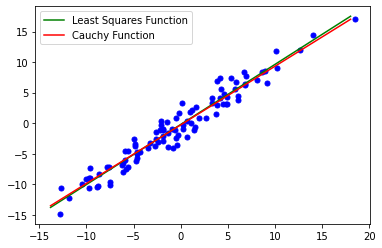

In [11]:
plt.plot(x11, x22, 'bo', markersize=5, c='blue')
plt.plot()
reg2 = np.arange(x11.min() - 1, x22.max() + 1, 0.1)
plt.plot(reg2, reg2*coeffs[0] + coeffs[1], color = 'green', label = "Least Squares Function")
plt.plot(reg2, reg2*coeffs2[0] + coeffs2[1], color = 'red', label = "Cauchy Function")
plt.legend(loc="best")

We observe that both methods perform well when there are no outliers present in the dataset.

2.4 We now compare the results with only one outlier. As previously suggested in 2.1, the Cauchy loss function is expected to be more robust than the quadratic function in handling outliers

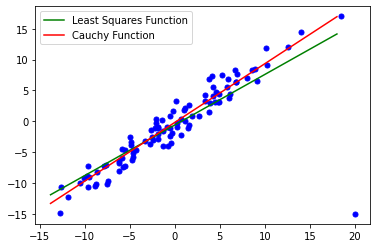

In [12]:
# Adding one outlier in the dataset
points1[1] = [20, -15]

x11 = points1[:, 0]
x22 = points1[:, 1]

# Get the values for w0 and w1 for both methods
coeffs, steps, f, iters = grad_descent(func, x11, x22, 0, 0, 100, 10**-3)
coeffs2, steps2, f2, iters2 = grad_descent_cauchy(cauchy, x11, x22, 0, 0, 100, 10**-3, c = 1)

# plot the functions
plt.plot(x11, x22, 'bo', markersize=5, c='blue')
plt.plot()
reg2 = np.arange(x11.min() - 1, x22.max() + 1, 0.1)
plt.plot(reg2, reg2 * coeffs[0] + coeffs[1], color = 'green', label = "Least Squares Function")
plt.plot(reg2, reg2 * coeffs2[0] + coeffs2[1], color = 'red', label = "Cauchy Function")
plt.legend(loc="best")

By adding a single outlier to the dataset, we observe that LSM moved a bit closer to the direction of the outlier, indicating its sensitivity to his presence. In contrast, the Cauchy function continues to fit the dataset effectively, demonstrating that it is not significantly affected by the outlier.

2.5 We now proceed to investigate the influence of the parameter $c$ on the obtained parameters. It is suggested to examine the results for various values of $c$, specifically $c = 1$, $c = 100$, $c = \frac{1}{100}$ and $c = \frac{1}{1000}$.  To facilitate this analysis, we plot the histogram of the error function $|u|$ and compare it with the shapes of the corresponding
$ρ(u)$ functions. Additionally, a zoomed-in view of the Cauchy function will be implemented to observe the interval in which the function exhibits quadratic behavior

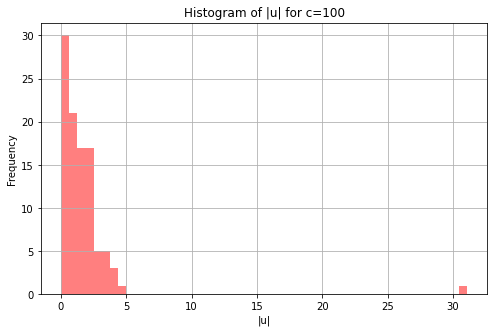

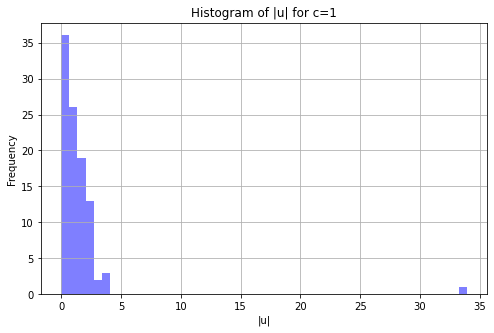

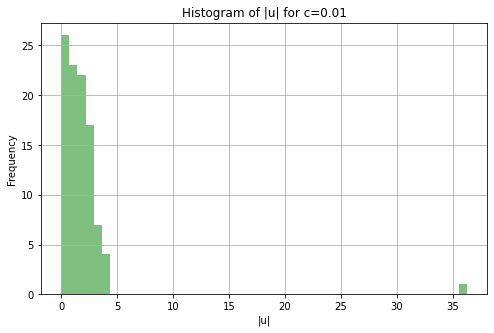

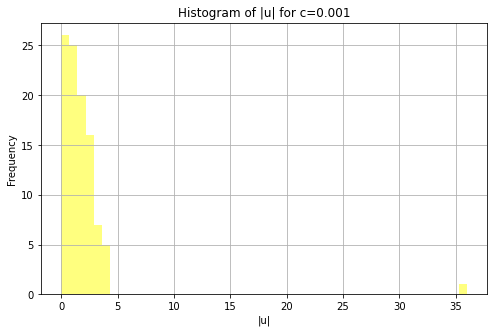

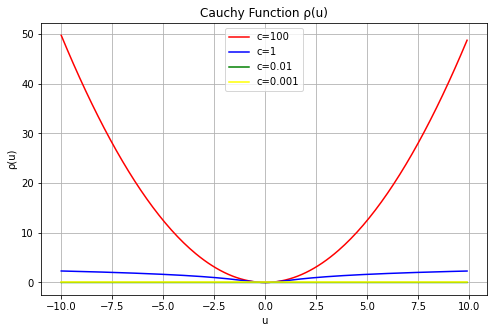

In [13]:
import numpy as np
import matplotlib.pyplot as plt

cauchy_c = [100, 1, 1/100, 1/1000]
colors = ['red', 'blue', 'green', 'yellow']


# Calculate the error function |u| for each c
error_functions = []
for i in range(len(cauchy_c)):
    coeffs2, steps2, f2, iters2 = grad_descent_cauchy(cauchy, x11, x22, 1, 1, 1000, 10**-6, c=cauchy_c[i])
    error = np.abs(x22 - coeffs2[0] * x11 - coeffs2[1])
    error_functions.append(error)


    # Plot histogram for the current value of c
    plt.figure(figsize=(8, 5))
    plt.hist(error, bins=50, color=colors[i], alpha=0.5)
    plt.title(f'Histogram of |u| for c={cauchy_c[i]}')
    plt.xlabel('|u|')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Generate a range of values for the Cauchy function after plotting histograms
u_values = np.arange(-10, 10, 0.1)
cauchy_functions = [c**2 / 2 * np.log(1 + (u_values / c)**2) for c in cauchy_c]

# Create a separate plot for Cauchy functions
plt.figure(figsize=(8, 5))
for i in range(len(cauchy_c)):
    plt.plot(u_values, cauchy_functions[i], color=colors[i], label=f'c={cauchy_c[i]}')

plt.title('Cauchy Function ρ(u)')
plt.xlabel('u')
plt.ylabel('ρ(u)')
plt.legend()
plt.grid(True)
plt.show()


By observing the histograms, we note that all of them have a peak at smaller error values, indicating a good fit of the Cauchy function to the majority of the data points, even as c changes. This peak represents inliers, which are data points that fit well within the model. The single outlier we introduced p=[20, -15] is easily recognizable because it has a larger residual and appears as a sparse value, away from zero. We observe that this distance from zero increases as c decreases, indicating that the function becomes progressively more robust to the influence of the outlier as c diminishes.
This behavior is also reflected in the graph of the Cauchy function. For c=100, we can see that the Cauchy loss function approximates the behavior of the Least Squares error function. As noted earlier, the Least Squares method is sensitive to the presence of even a single outlier. In contrast, for smaller values of c, the Cauchy function becomes more robust, as very large residual values (indicative of outliers) do not significantly increase the value of the loss function to be minimized.

2.6 We now gradually introduce more number of outliers into the dataset using c=1 and c=1 100.

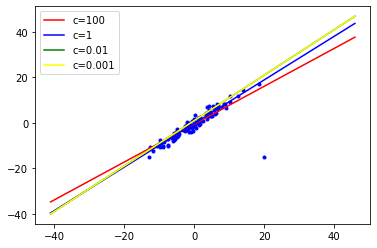

In [14]:
coeffs, steps, f, iters = grad_descent(func, x11, x22, 0, 0, 100, (10**-3))
x11 = points1[:, 0]
x22 = points1[:, 1]
plt.plot(x11, x22, 'bo',markersize=3, c='blue')
plt.plot()
reg4 = np.arange(x11.min() - 1, x22.max() + 1, 0.1)
for i in range(len(cauchy_c)):
    coeffs2, steps2, f2, iters2 = grad_descent_cauchy(cauchy, x11, x22, 1, 1, 1000, 10**-3, c = cauchy_c[i])
    plt.plot(x_aux, x_aux * coeffs2[0] + coeffs2[1], color = colors[i], label=f'c={cauchy_c[i]}')

plt.legend(loc="best")

We observe that when $c=100$, the Cauchy's function is more affected by the presenct of the outliers as it started to align more closely with the direction of the outliers, behaving like LMS. For $c= 1, c=0.01$ and $c=0.001$ the regressor function appears to be less affected by outliers. We conclude that that the Cauchy's function becomes more sensitive to variability as the c value increases.

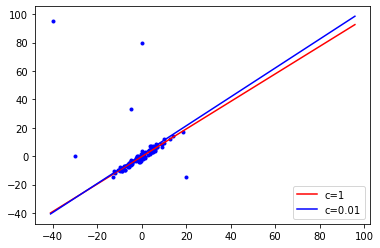

In [15]:
# Adding more outliers
points1[12] = [0, 80]
points1[13] = [-5, 33]
points1[14] = [-30, 0]
points1[15] = [-40, 95]


# C values
cauchy_c = [1, 1/100]
x12 = points1[:, 0]
x22 = points1[:, 1]

# Plot the dataset with outliers
plt.plot(x12, x22, 'bo', markersize=3, c='blue')

for i in range(len(cauchy_c)):
    coeffs2, steps2, f2, iters2 = grad_descent_cauchy(cauchy, x12, x22, 1, 1, 1000, 10**-6, c=cauchy_c[i])
    reg4 = np.arange(x12.min() - 1, x22.max() + 1, 0.1)
    plt.plot(reg4, reg4 * coeffs2[0] + coeffs2[1], color=colors[i], label=f'c={cauchy_c[i]}')

plt.legend(loc="best")

We observe that both functions, with  c = 1 and c = 0.01 demonstrate significant robustness to outliers


Next, we will introduce a larger number of outliers with more extreme values to examine how the model behaves

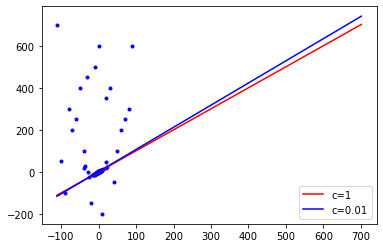

In [16]:
# Adding Sparse Outliers
points[17] = [-80, 300]
points[18] = [-70, 200]
points[19] = [-60, 250]
points[20] = [-50, 400]
points[21] = [-40, 100]
points[22] = [-30, 450]
points[23] = [-20, -150]
points[24] = [-10, 500]
points[25] = [0, 600]
points[26] = [10, -200]
points[27] = [20, 350]
points[28] = [30, 400]
points[29] = [40, -50]
points[30] = [50, 100]
points[31] = [60, 200]
points[32] = [70, 250]
points[33] = [80, 300]
points[34] = [-90, -100]
points[35] = [-100, 50]
points[36] = [-110, 700]
points[37] = [90, 600]



cauchy_c = [1, 1/100]
x12 = points[:, 0]
x22 = points[:, 1]

# Plot
plt.plot(x12, x22, 'bo', markersize=3, c='blue')

for i in range(len(cauchy_c)):
    coeffs2, steps2, f2, iters2 = grad_descent_cauchy(cauchy, x12, x22, 1, 1, 1000, 10**-6, c=cauchy_c[i])
    reg4 = np.arange(x12.min() - 1, x22.max() + 1, 0.1)
    plt.plot(reg4, reg4 * coeffs2[0] + coeffs2[1], color=colors[i], label=f'c={cauchy_c[i]}')


predictions = coeffs2[0] * points[:, 0] + coeffs2[1]
Q = 0.5*(((predictions - points[:, 1]) ** 2).sum())

plt.legend(loc="best")


We observe that while increasing the number of outliers, the Cauchy function with c=1 becomes bit more influenced by them, while the function with c=0.01 continues to demonstrate robustness, proving to be the best choice in the presence of extreme outliers.